In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Generate Dataset

In [2]:
and_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 0},
    {'x1': 1, 'x2': 0, 'y': 0},
    {'x1': 1, 'x2': 1, 'y': 1}
]

and_data = pd.DataFrame(and_data)
and_data

,x1,x2,y
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


In [3]:
or_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': 1, 'x2': 0, 'y': 1},
    {'x1': 1, 'x2': 1, 'y': 1}
]

or_data = pd.DataFrame(or_data)
or_data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,1


In [4]:
xor_data = [
    {'x1': 0, 'x2': 0, 'y': 0},
    {'x1': 0, 'x2': 1, 'y': 1},
    {'x1': 1, 'x2': 0, 'y': 1},
    {'x1': 1, 'x2': 1, 'y': 0}
]

xor_data = pd.DataFrame(xor_data)
xor_data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


## Define Sigmoid

0.000123394575986
0.5
0.999876605424


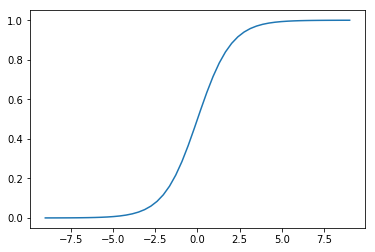

In [5]:
def sigmoid(n):
    return 1 / (1 + np.exp(-n))

xx = np.linspace(start=-9.0, stop=+9.0)
yy = sigmoid(xx)

plt.plot(xx, yy)

print(sigmoid(-9))
print(sigmoid(0))
print(sigmoid(+9))

## Gradient Descent (AND)

In [6]:
data = and_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

x1, x2, y

(array([0, 0, 1, 1]), array([0, 1, 0, 1]), array([0, 0, 0, 1]))

In [7]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
learning_rate = 0.01

num_epoch = 100

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
        
print("{0} error = {1:.5f}".format(epoch, error))

15 error = 0.00000


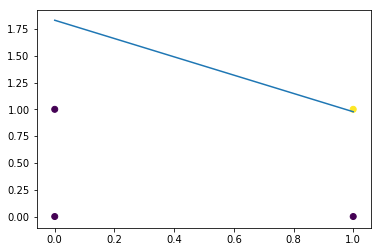

In [8]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

## OR

In [9]:
data = or_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

x1, x2, y

(array([0, 0, 1, 1]), array([0, 1, 0, 1]), array([0, 1, 1, 1]))

In [10]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
learning_rate = 0.01

num_epoch = 100

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
        
print("{0} error = {1:.5f}".format(epoch, error))

15 error = 0.00000


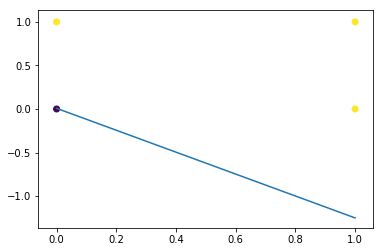

In [11]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

## XOR

In [12]:
data = xor_data.copy()

x1 = data['x1'].values
x2 = data['x2'].values
y = data['y'].values

x1, x2, y

(array([0, 0, 1, 1]), array([0, 1, 0, 1]), array([0, 1, 1, 0]))

In [13]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
learning_rate = 0.01

num_epoch = 100

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
        
print("{0} error = {1:.5f}".format(epoch, error))

99 error = 0.75000


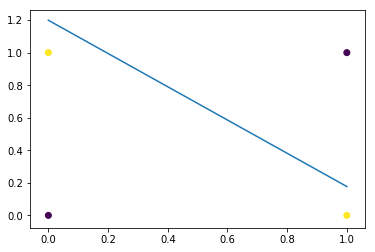

In [14]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

## XOR => AND

In [15]:
data = xor_data.copy()

data["AND(x1^, x2)"] = (data["x1"] == 0).astype('int') & data["x2"]
data["AND(x1, x2^)"] = data["x1"] & (data["x2"] == 0).astype('int')

data

,x1,x2,y,"AND(x1^, x2)","AND(x1, x2^)"
0,0,0,0,0,0
1,0,1,1,1,0
2,1,0,1,0,1
3,1,1,0,0,0


In [16]:
x1 = data["AND(x1^, x2)"].values
x2 = data["AND(x1, x2^)"].values

In [17]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
learning_rate = 0.01

num_epoch = 100

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    b = b - (y_predict - y).mean()
        
print("{0} error = {1:.5f}".format(epoch, error))

4 error = 0.00000


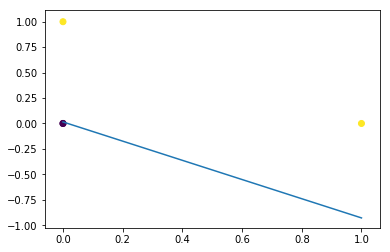

In [18]:
xx = np.linspace(start=0.0, stop=1.0)
yy = -1.0 * (w1 * xx + b) / w2

plt.plot(xx, yy)
plt.scatter(x1, x2, c=y)

## Polynormial Neural Network

In [19]:
data = xor_data.copy()

data["x1*x1"] = data["x1"] * data["x1"]
data["x1*x2"] = data["x1"] * data["x2"]
data["x2*x2"] = data["x2"] * data["x2"]

data

,x1,x2,y,x1*x1,x1*x2,x2*x2
0,0,0,0,0,0,0
1,0,1,1,0,0,1
2,1,0,1,1,0,0
3,1,1,0,1,1,1


In [20]:
x1 = data["x1"].values
x2 = data["x2"].values
x3 = data["x1*x1"].values
x4 = data["x1*x2"].values
x5 = data["x2*x2"].values
y = data["y"].values

In [21]:
w1 = np.random.uniform(low=0.0, high=1.0)
w2 = np.random.uniform(low=0.0, high=1.0)
w3 = np.random.uniform(low=0.0, high=1.0)
w4 = np.random.uniform(low=0.0, high=1.0)
w5 = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)
learning_rate = 0.01

num_epoch = 100

for epoch in range(num_epoch):
    y_predict = x1 * w1 + x2 * w2 + x3 * w3 + x4 * w4 + x5 * w5 + b
    y_predict = sigmoid(y_predict)
    
    predict = y_predict > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    w1 = w1 - ((y_predict - y) * x1).mean()
    w2 = w2 - ((y_predict - y) * x2).mean()
    w3 = w3 - ((y_predict - y) * x3).mean()
    w4 = w4 - ((y_predict - y) * x4).mean()
    w5 = w5 - ((y_predict - y) * x5).mean()
    b = b - (y_predict - y).mean()
        
print("{0} error = {1:.5f}".format(epoch, error))

23 error = 0.00000


## Multi-layer Neural Network (backpropagation)

- 3으로 되는건 그냥 임의로 정함

In [89]:
data = xor_data.copy()
data

,x1,x2,y
0,0,0,0
1,0,1,1
2,1,0,1
3,1,1,0


In [90]:
X = data[["x1", "x2"]].values
y = data["y"].values
y = y.reshape(4, 1)

w1 = np.random.uniform(low=0.0, high=1.0, size=(2, 3))
w2 = np.random.uniform(low=0.0, high=1.0, size=(3, 1))
b1 = np.random.uniform(low=0.0, high=1.0, size=3)
b2 = np.random.uniform(low=0.0, high=1.0)

num_epoch = 1000
learning_rate = 1

for epoch in range(num_epoch):
    # Forward propagation
    z1 = X.dot(w1) + b1
    a1 = sigmoid(z1)
    z2 = a1.dot(w2) + b2
    a2 = sigmoid(z2)
    
    predict = a2 > 0.5
    error = (predict != y).mean()
    
    if error == 0:
        break
    
    # Backpropagation
    d2 = a2 - y
    d1 = (d2.dot(w2.T) * a1 * (1 - a1))
    
    w2 = w2 - learning_rate * a1.T.dot(d2)
    w1 = w1 - learning_rate * X.T.dot(d1)
    
    
print("---")
print("{0} error = {1:.5f}".format(epoch, error))

---
141 error = 0.00000


- 이미지 셋 느리다. 수렴이 안된다.
    - 웨이트 초기화, 러닝 레이트
    - + bias 추가
    - Hidden layer 를 두개와 세개로 추가